# Simulator Client

This version uses the end-to-end simulator library rather than doing work itself.

In [1]:
import cupy as cp
import viz_cuda
import simulation
from pyinstrument import Profiler
from pyinstrument.renderers import ConsoleRenderer

/home/joel/.local/lib/python3.8/site-packages/cupyx/jit/_interface.py:161: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')


In [2]:
profiler = Profiler()
profiler.start()

mempool = cp.get_default_memory_pool()
mempool.free_all_blocks()
print(f"mempool.used_bytes {mempool.used_bytes()}")

session = profiler.stop()
profile_renderer = ConsoleRenderer(unicode=True, color=True, show_all=True, time='percent_of_total')
print(profile_renderer.render(session))

mempool.used_bytes 0

  _     ._   __/__   _ _  _  _ _/_   Recorded: 22:15:21  Samples:  1
 /_//_/// /_\ / //_// / //_'/ //     Duration: 0.024     CPU time: 0.004
/   _/                      v4.2.0

Program: /home/joel/.local/lib/python3.8/site-packages/ipykernel_launcher.py -f /home/joel/.local/share/jupyter/runtime/kernel-b418548c-0c3d-49b0-a457-49104fbbde86.json

100% run_code  IPython/core/interactiveshell.py:3400
└─ 100% <module>  <ipython-input-2-a603d3534bf0>:5




In [3]:
profiler.reset()
profiler.start()

results = simulation.SimulationResult()
simulator = simulation.Simulator(results, waves = 1, bundles = 10000000, bundle_size = 1)

session = profiler.stop()
profile_renderer = ConsoleRenderer(unicode=True, color=True, show_all=True, time='percent_of_total')
print(profile_renderer.render(session))


  _     ._   __/__   _ _  _  _ _/_   Recorded: 22:15:22  Samples:  0
 /_//_/// /_\ / //_// / //_'/ //     Duration: 0.000     CPU time: 0.000
/   _/                      v4.2.0

Program: /home/joel/.local/lib/python3.8/site-packages/ipykernel_launcher.py -f /home/joel/.local/share/jupyter/runtime/kernel-b418548c-0c3d-49b0-a457-49104fbbde86.json

No samples were recorded.




In [4]:
profiler.reset()
profiler.start()

#simulator.run()
simulator.run_all_waves()

session = profiler.stop()
profile_renderer = ConsoleRenderer(unicode=True, color=True, show_all=True, time='percent_of_total')
print(profile_renderer.render(session))

duration 0.0 52442366
duration 0.5 86520
duration 1.0 187631943
photon batch energy joules: 3.579e-05
photon batch power watts: 3.579e-02
emitter area m^2: 1.000e-06
batch radiosity w/m^2: 3.579e+04
duration 1.5 346635004
duration 2.0 39578318
duration 3.0 157619194
duration 4.0 121842696
duration 5.0 62002325
duration 6.0 70524600
duration 7.0 54016474

  _     ._   __/__   _ _  _  _ _/_   Recorded: 22:15:23  Samples:  118
 /_//_/// /_\ / //_// / //_'/ //     Duration: 1.093     CPU time: 1.097
/   _/                      v4.2.0

Program: /home/joel/.local/lib/python3.8/site-packages/ipykernel_launcher.py -f /home/joel/.local/share/jupyter/runtime/kernel-b418548c-0c3d-49b0-a457-49104fbbde86.json

100% run_code  IPython/core/interactiveshell.py:3400
└─ 100% <module>  <ipython-input-4-81b32161d64f>:5
   └─ 100% run_all_waves  simulation.py:265
      └─ 100% run  simulation.py:269
         ├─ 44% histogram  simulation.py:128
         │  └─ 44% one_histogram  simulation.py:91
         │  

LED emitted photons: 30000000


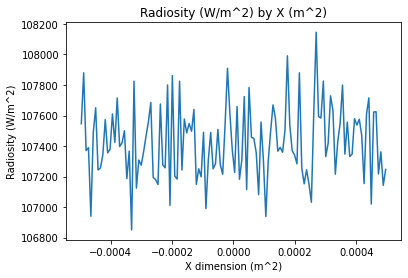

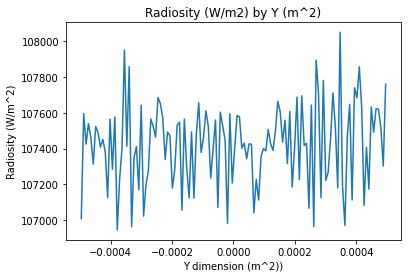

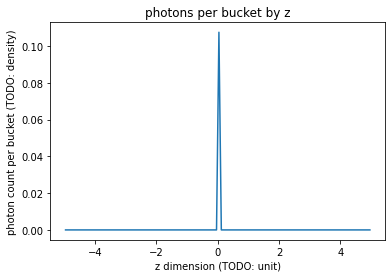

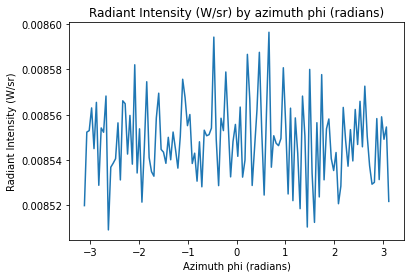

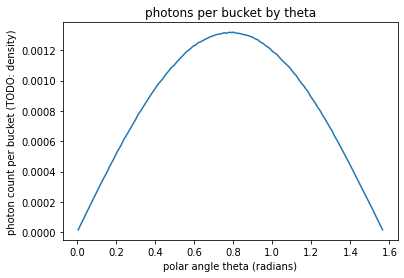

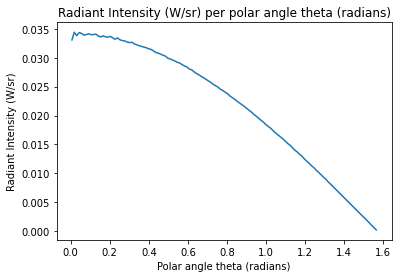

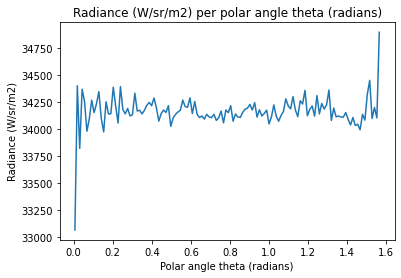

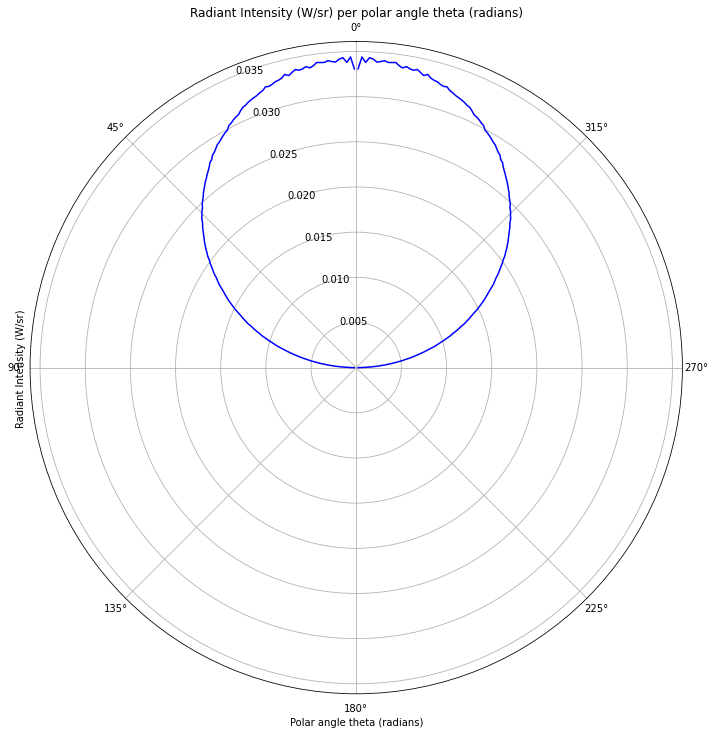

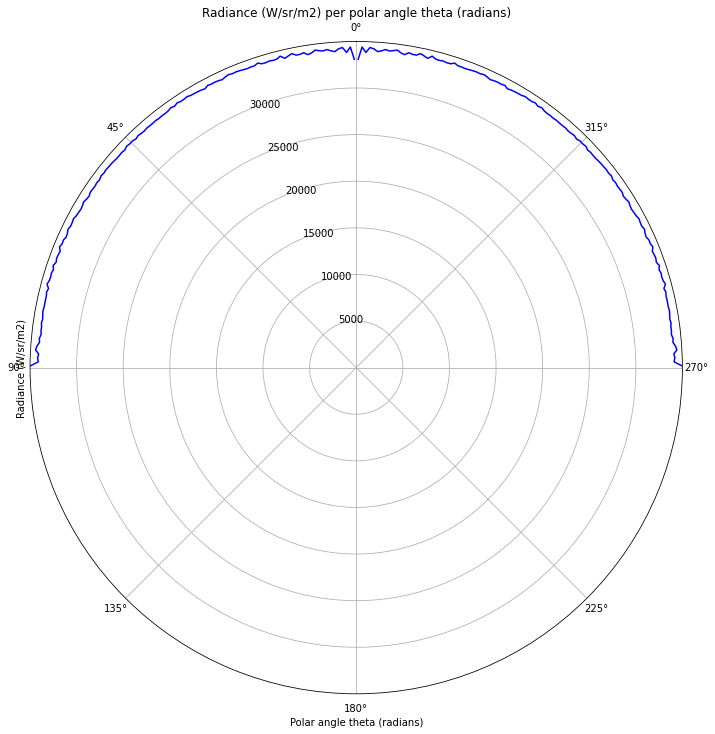

Output()

In [5]:
print(f"LED emitted photons: {results._source_stage._photons_size}")
viz_cuda.plot_all_histograms(results._source_stage)
viz_cuda.plot_stage_3d(results._source_stage)

diffuser incident photons: 30000000


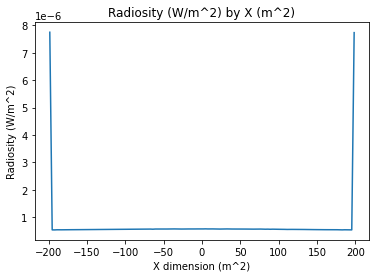

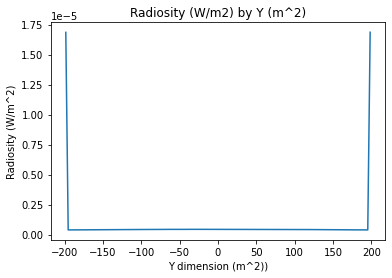

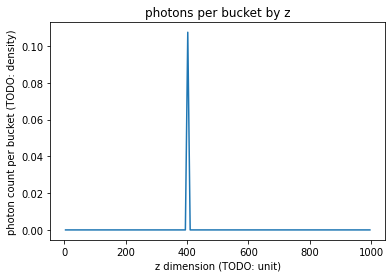

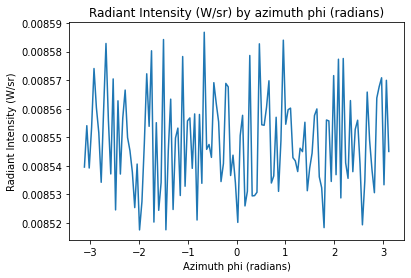

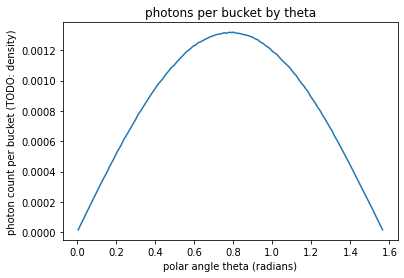

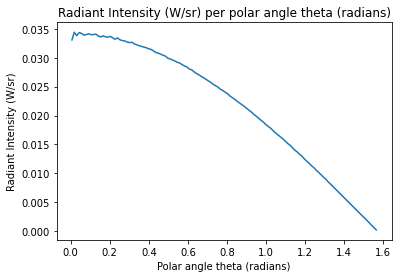

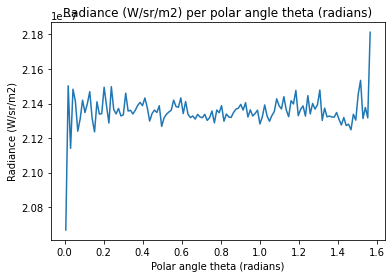

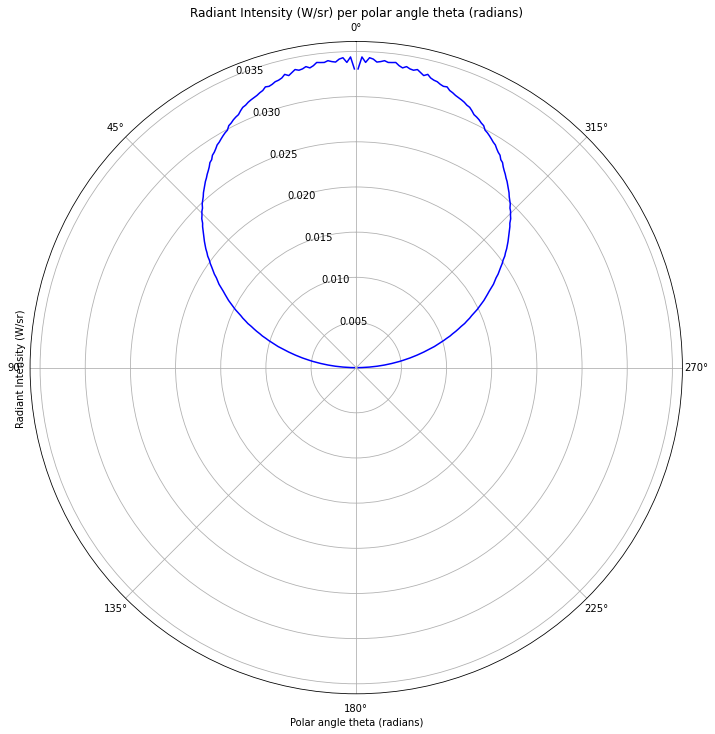

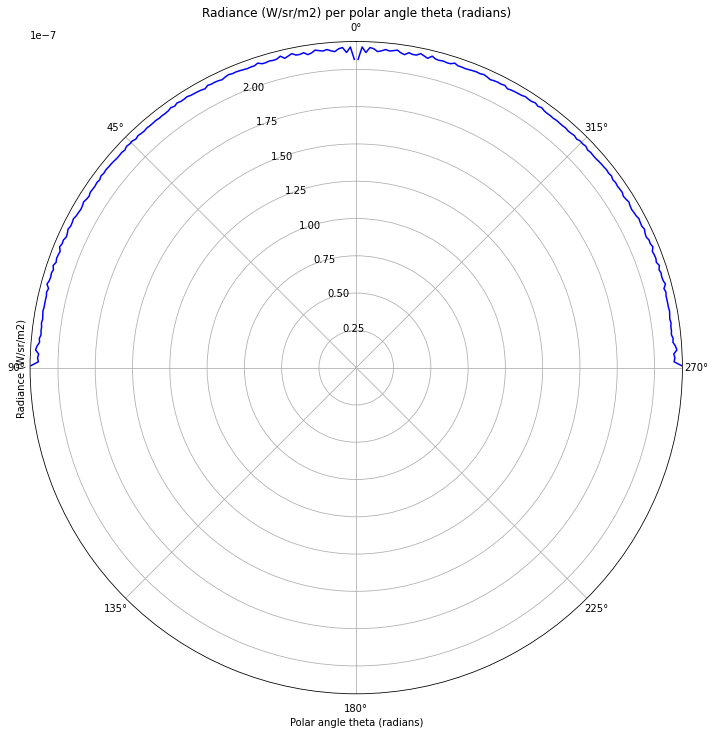

Output()

In [6]:
print(f"diffuser incident photons: {results._box_stage._photons_size}")
viz_cuda.plot_all_histograms(results._box_stage)
viz_cuda.plot_stage_3d(results._box_stage)

diffuser scattered photons: 21299621


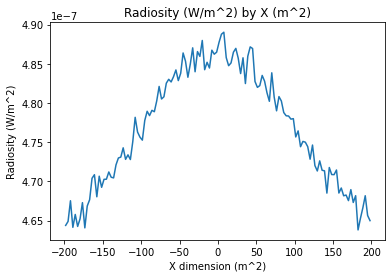

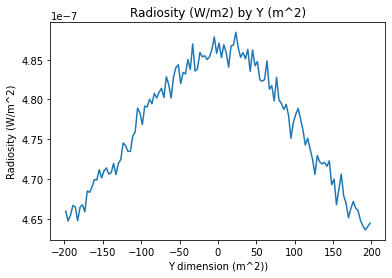

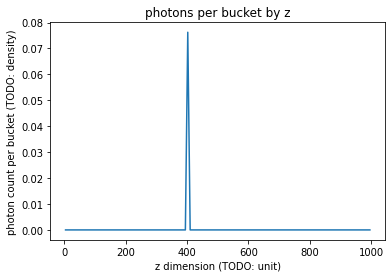

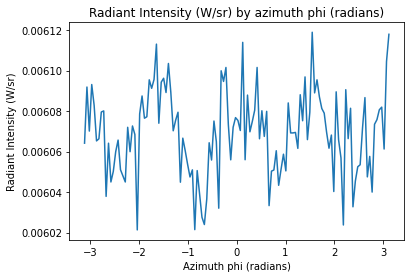

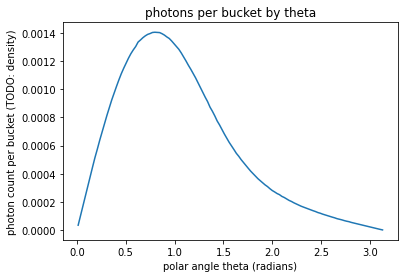

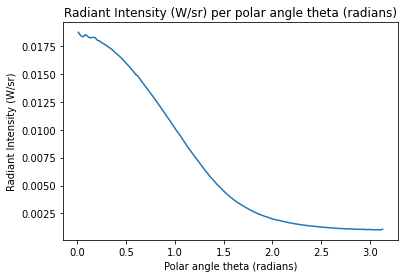

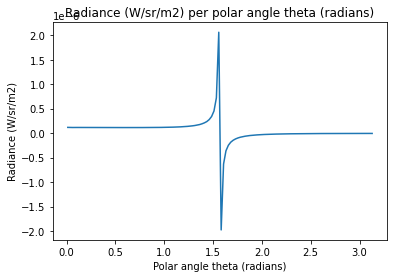

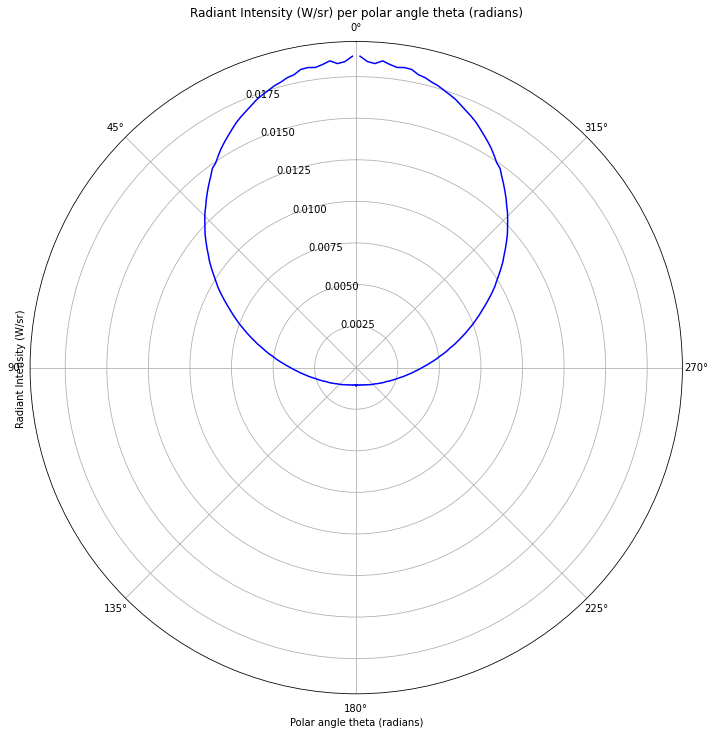

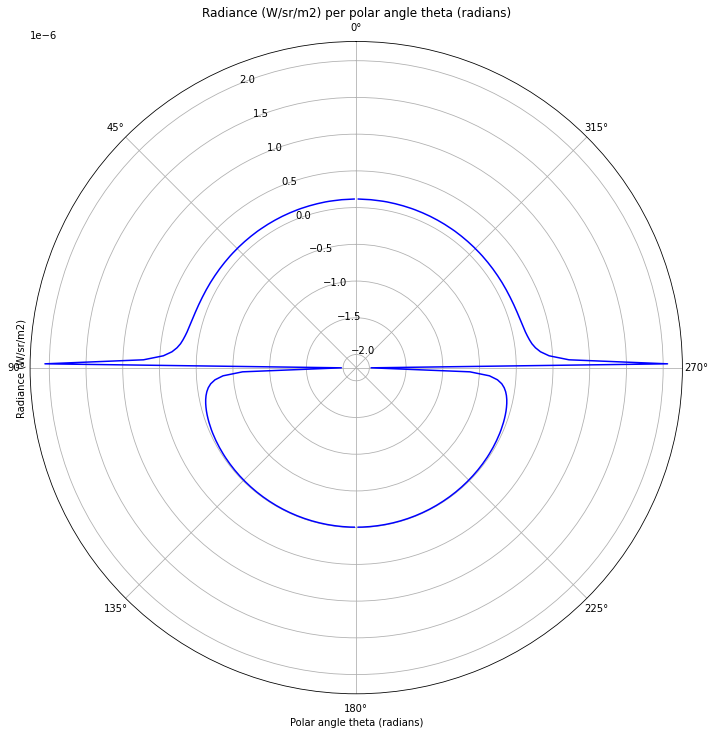

Output()

In [7]:
print(f"diffuser scattered photons: {results._diffuser_stage._photons_size}")
viz_cuda.plot_all_histograms(results._diffuser_stage)
viz_cuda.plot_stage_3d(results._diffuser_stage)

reflector indicent photons: 2102


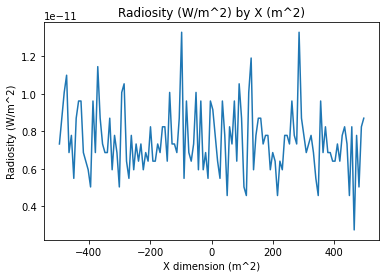

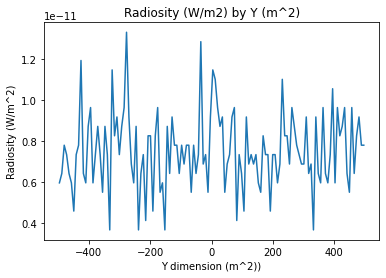

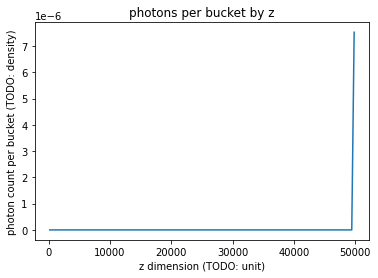

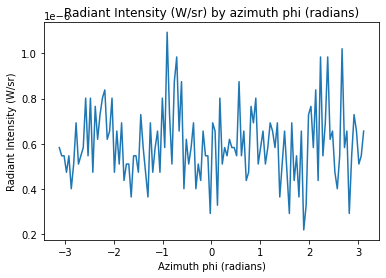

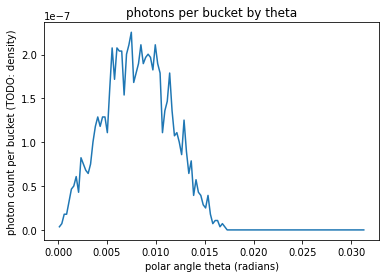

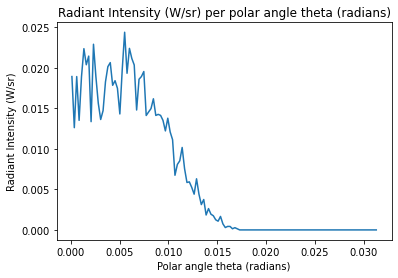

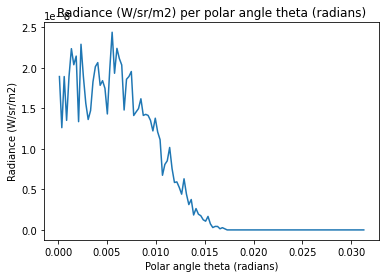

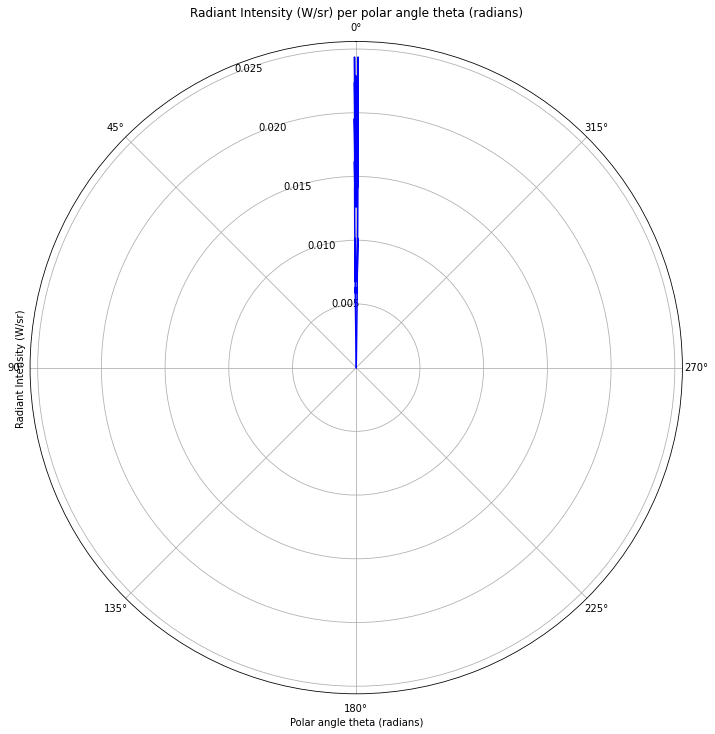

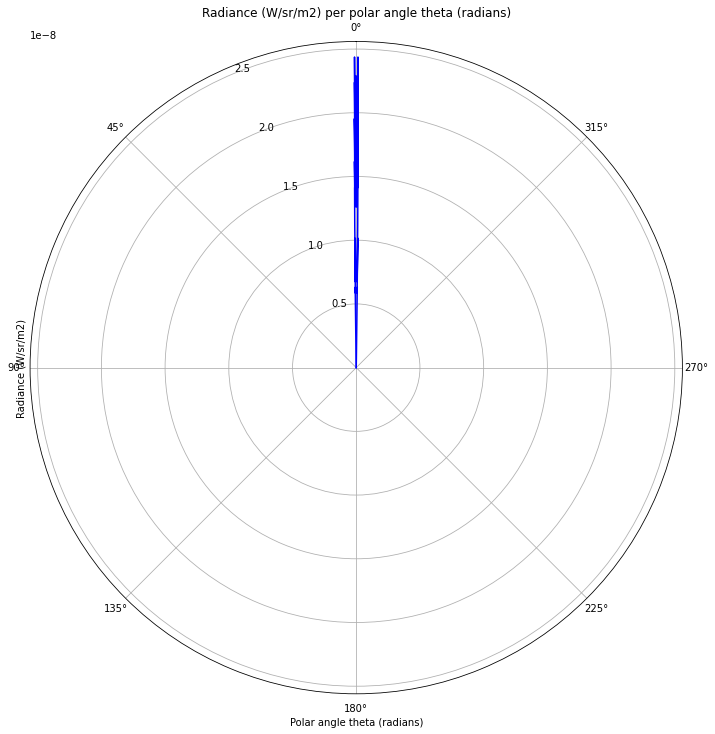

Output()

In [8]:
print(f"reflector indicent photons: {results._outbound_stage._photons_size}")
viz_cuda.plot_all_histograms(results._outbound_stage)
viz_cuda.plot_stage_3d(results._outbound_stage)

reflected photons: 2102


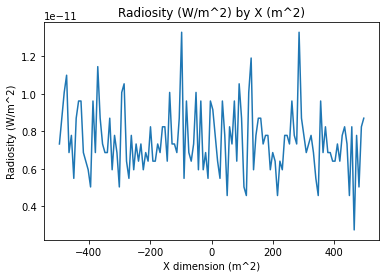

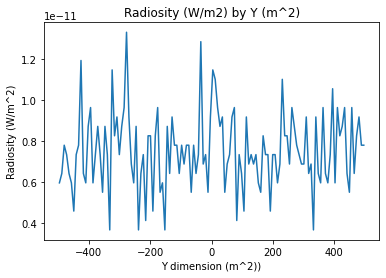

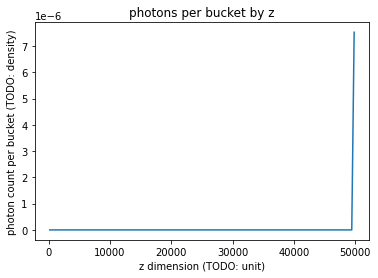

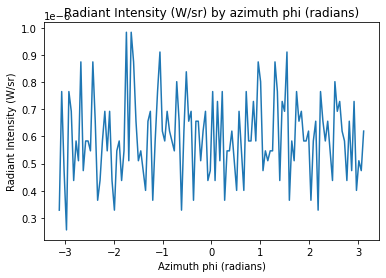

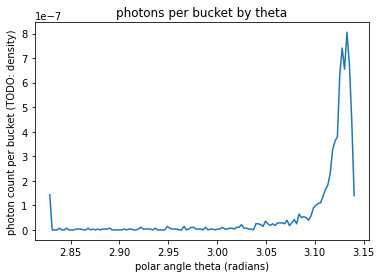

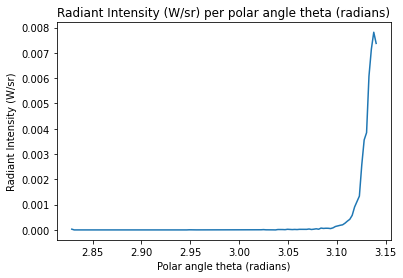

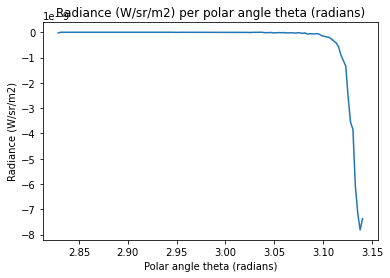

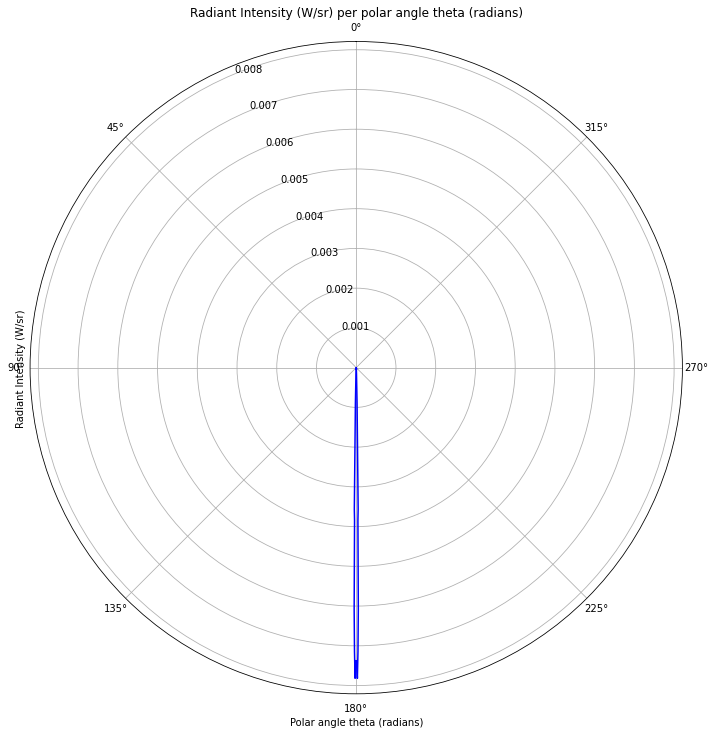

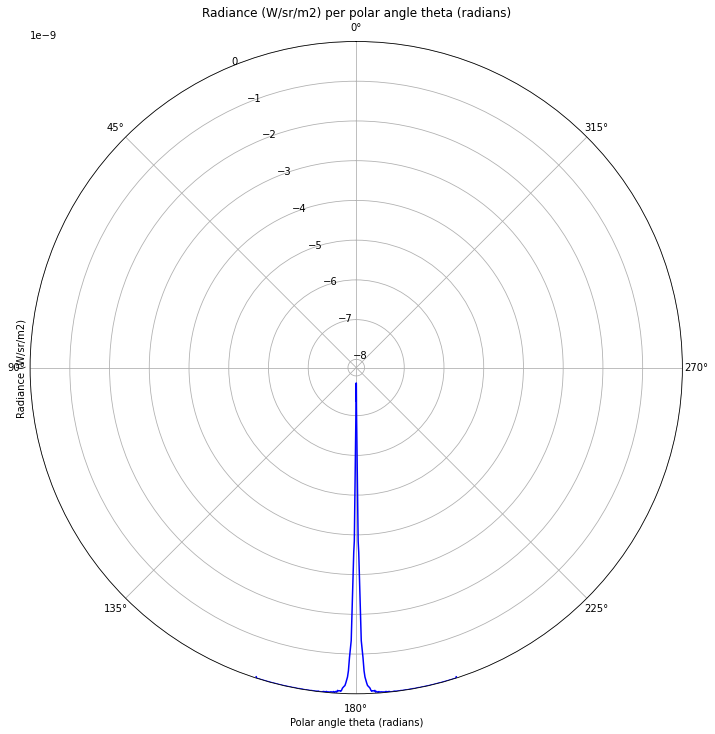

Output()

In [9]:
print(f"reflected photons: {results._inbound_stage._photons_size}")
viz_cuda.plot_all_histograms(results._inbound_stage)
viz_cuda.plot_stage_3d(results._inbound_stage)

camera plane photons: 1424


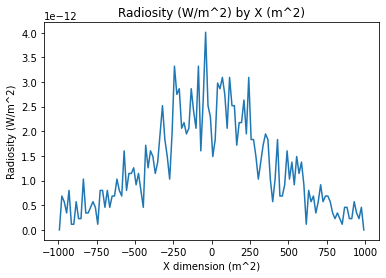

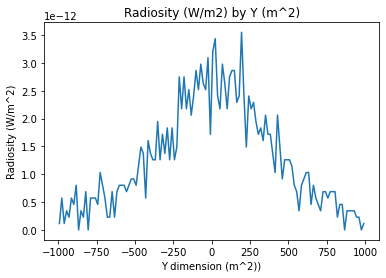

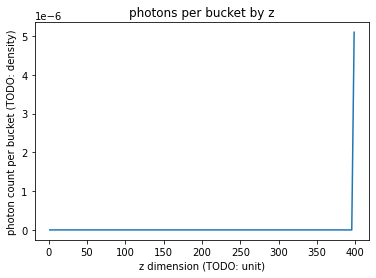

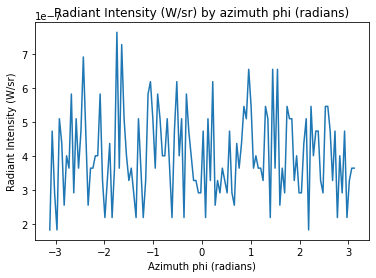

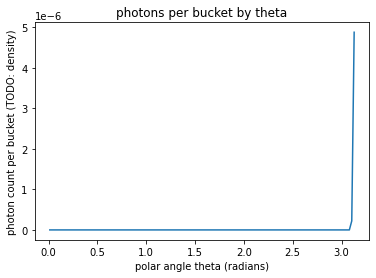

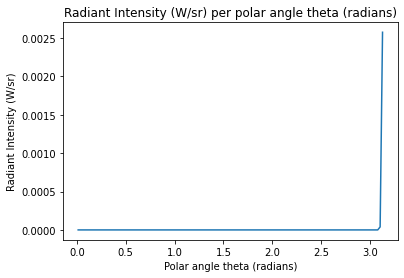

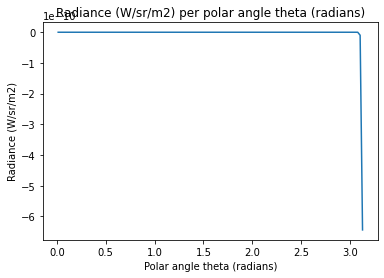

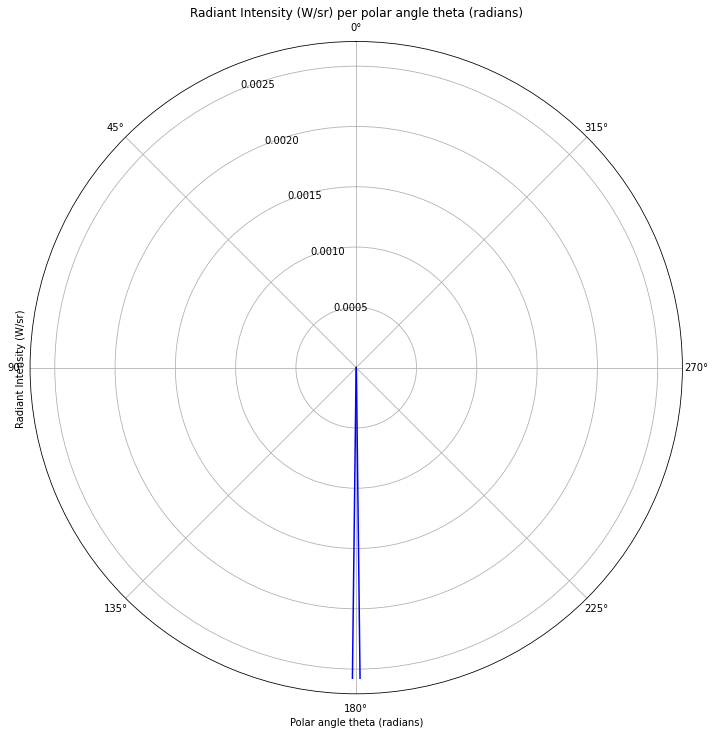

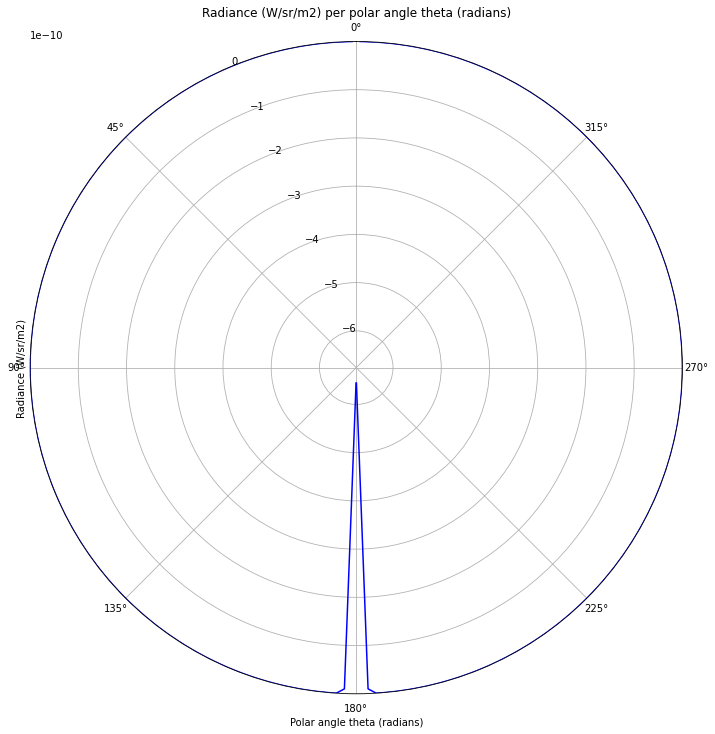

Output()

In [10]:
print(f"camera plane photons: {results._camera_plane_stage._photons_size}")
viz_cuda.plot_all_histograms(results._camera_plane_stage)
viz_cuda.plot_stage_3d(results._camera_plane_stage)